In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
import os
import requests

def download_file_from_google_drive(file_id, dest_path):
    URL = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : file_id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : file_id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, dest_path)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, dest_path):
    CHUNK_SIZE = 32768

    with open(dest_path, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
download_file_from_google_drive(file_id='1avc4YanDVFclJgRQKteiNoPY-2TnfXoCf2IRsjoN_jU',
                                    dest_path='./sample_data/data.csv')
df = pd.read_csv('./sample_data/data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Дата      1461 non-null   object
 1   Значение  1461 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.0+ KB


In [ ]:
df["date"] = pd.to_datetime(df["Дата"])
df["year"] = df["date"].dt.year.astype("int")
df["month"] = df["date"].dt.month.astype("int")
df["week"] = df["date"].dt.week.astype("int")
df["day"] = df["date"].dt.day.astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Дата      1461 non-null   object        
 1   Значение  1461 non-null   int64         
 2   date      1461 non-null   datetime64[ns]
 3   year      1461 non-null   int64         
 4   month     1461 non-null   int64         
 5   week      1461 non-null   int64         
 6   day       1461 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 80.0+ KB


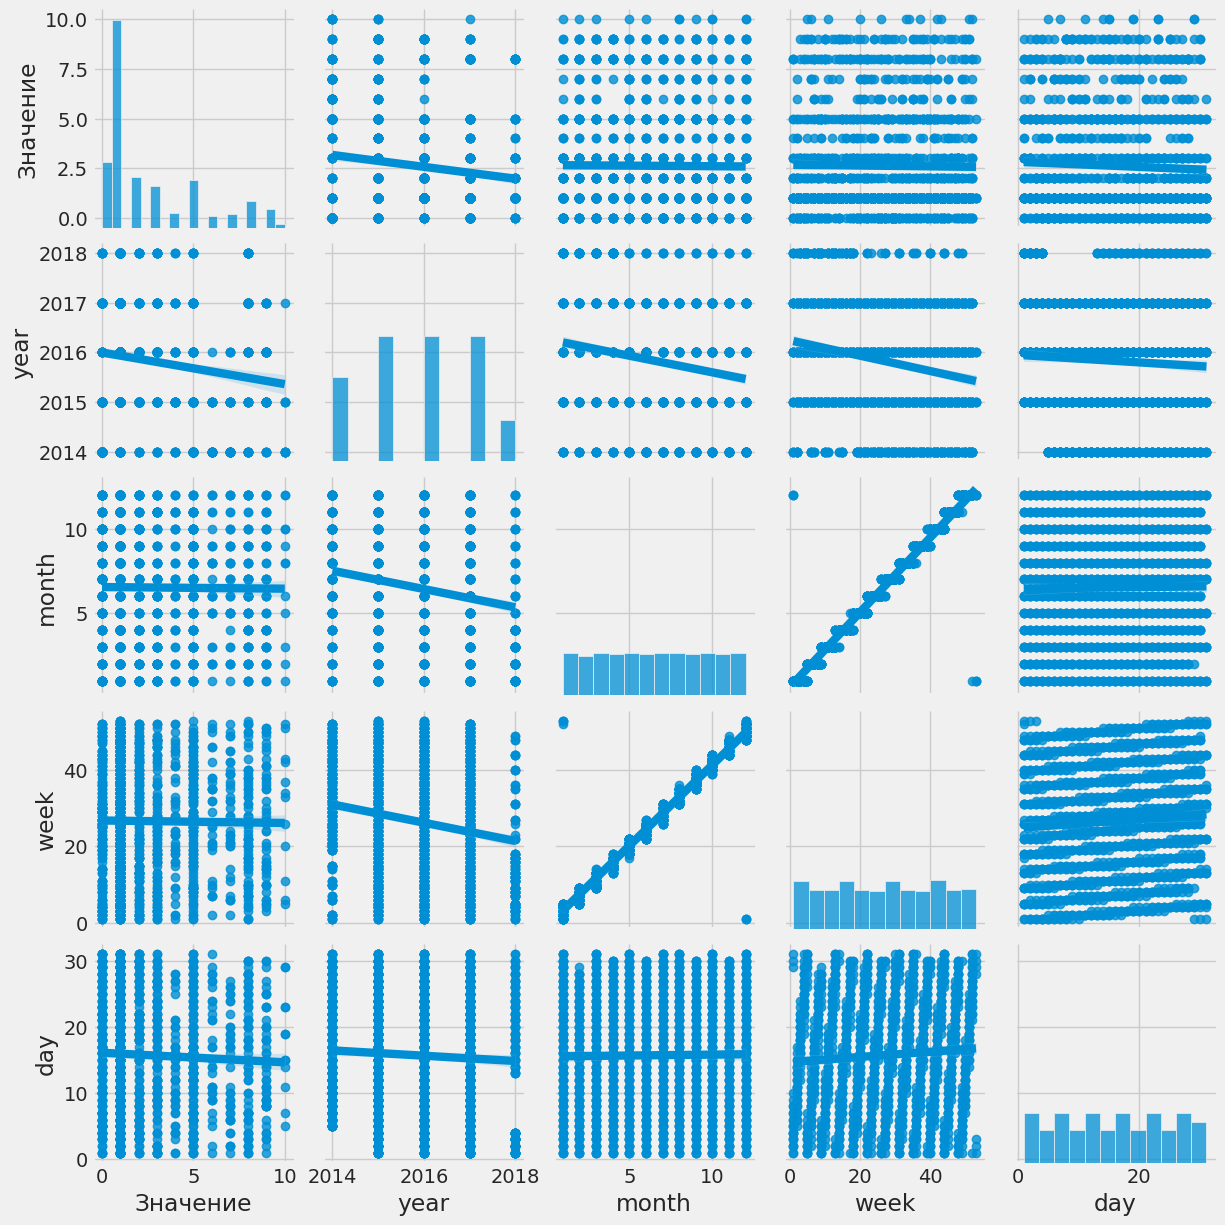

In [ ]:
sns.pairplot(df, kind='reg')

In [ ]:
dg = df.groupby(["year", "month"]).agg({"Значение":["sum","count"]}).reset_index()
dg = pd.DataFrame({"year": dg["year"], "month": dg["month"], "sum": dg["Значение"]["sum"], "count": dg["Значение"]["count"]})
df = df.merge(dg, left_on=["year", "month"], right_on=["year", "month"])

Text(0.5, 1.0, 'Correlation of values')

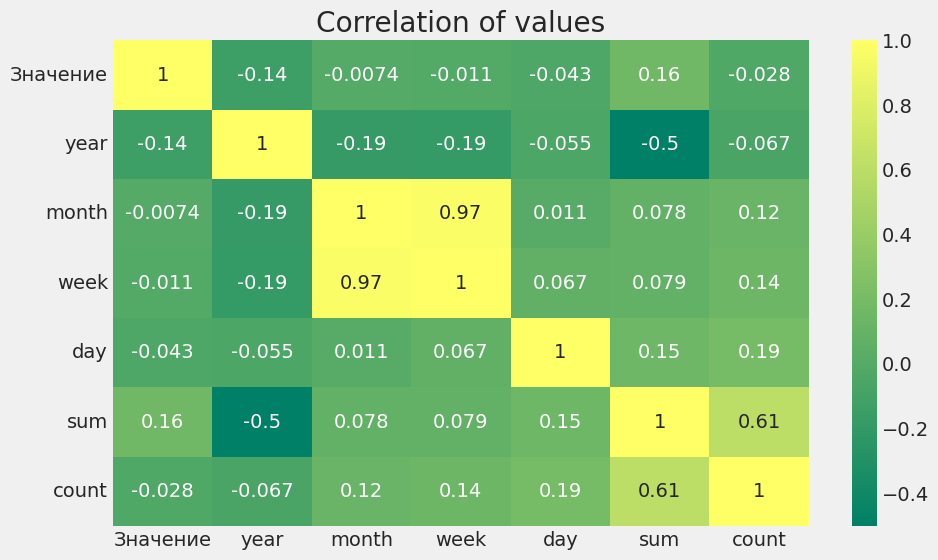

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Correlation of values')

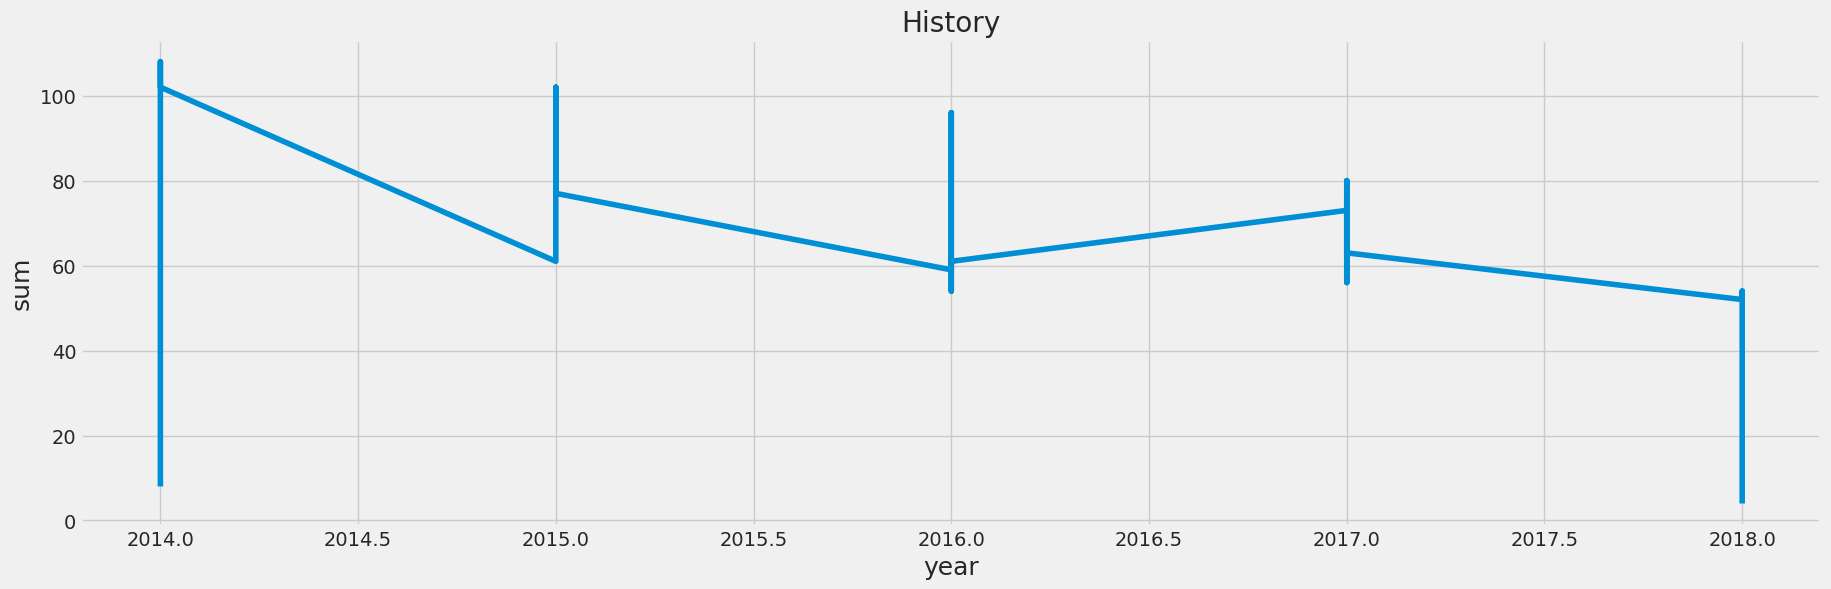

In [ ]:
plt.figure(figsize=(20,6))
plt.title('History')
plt.plot(df["year"], df["sum"])
plt.xlabel('year', fontsize=18)
plt.ylabel('sum', fontsize=18)
plt.show()